<a href="https://colab.research.google.com/github/gingerthorp/deepLeaning/blob/master/study/5_Learn%20the%20training%20Know-how/DL5_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [ ]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

## 검증 세트 준비하기

In [ ]:
print("x total size : ",len(x))
print("x_train_all size : ",len(x_train_all))
print("x_test size : ", len(x_test))


x total size :  569
x_train_all size :  455
x_test size :  114


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

print("x total size : ",len(x))       # 전체 데이터 사이즈  :100
print("x_train size : ",len(x_train)) # 학습 데이터 사이즈  :64
print("x_val size : ", len(x_val))    # 검증 데이터 사이즈  :16
print("x_test size : ", len(x_test))  # 테스트 데이터 사이즈 :20

x total size :  569
x_train size :  364
x_val size :  91
x_test size :  114


In [ ]:
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train,y_train)
sgd.score(x_val, y_val)

0.6923076923076923

#### 스케일을 조정하지 않고 모델을 훈련해 볼까요?

1. 훈련 데이터 준비하고 스케일 비교하기

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

['mean perimeter' 'mean area']


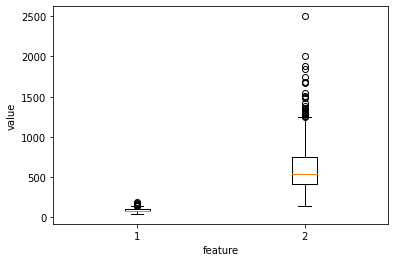

In [ ]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,[2,3]])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
class SingleLayer:
  def __init__(self, learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    self.w_history.append(self.w.copy())# 가중치를 기록합니다.
    np.random.seed(42)                # 무작위로 시드를 지정합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
      for i in indexes:      # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])         # 정방향 계산
        a = self.activation(z)         # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        self.w -= self.lr * w_grad     # 가중치 업데이트(학습률 적용)
        self.b -= b_grad               # 절편 업데이트
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        
        a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [ ]:
layer1 = SingleLayer()

In [ ]:
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


0.9120879120879121

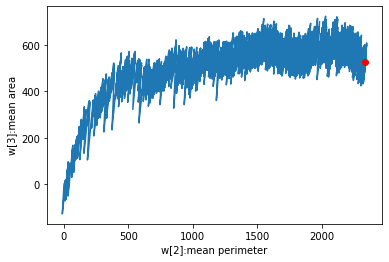

In [ ]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1],'ro')
plt.xlabel('w[2]:mean perimeter')
plt.ylabel('w[3]:mean area')
plt.show()


그래프를 보면 mean perimeter에 비해 mean area의 스케일 값이 크므로 w3값이 학습 과정에서 큰 폭으로 흔들리며 변화하고 있습니다.

이 그래프 현상으 'w3에 대한 그레이디언트가 크기 때문에 w3축을 따라 가중치가 요동치고 있다'라고 말합니다.

즉, 가중치의 최적값에 도달하는 동안 w3값이 크게 요동치므로 모델이 불안정하게 수렴한다는 것을 알수 있습니다.

이를 해결하기 위해 스케일을 조절해야 합니다.

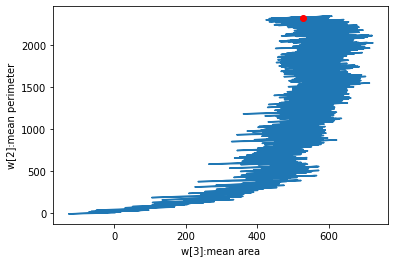

In [ ]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w3, w2)
plt.plot(w3[-1], w2[-1],'ro')
plt.ylabel('w[2]:mean perimeter')
plt.xlabel('w[3]:mean area')
plt.show()

In [ ]:
print("(w[2], w[3]) : ", w2[-1], ":", w3[-1])

(w[2], w[3]) :  2330.6013372131115 : 526.7779780348875


### 스케일을 조정해 모델을 훈련합니다.

신경망에서 자주 사용하는 스케일 조정 방법 중 하나는 표준화(standardization)입니다.

표준화는 특성값에서 평균을 빼고 표준 편차로 나누면 됩니다.
표준화를 하면 평균이 0이고 분산이 1인 특성이 만들어집니다.

표준화 공식  
$z = {x - \mu \over s}$

표준편차 공식
$s = \sqrt{{1 \over m}\sum_{i=0}^m {(x_i-\mu)}^2	}$

$m은 샘플의 수이고 \mu는 평균 입니다.$

In [ ]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean)/train_std

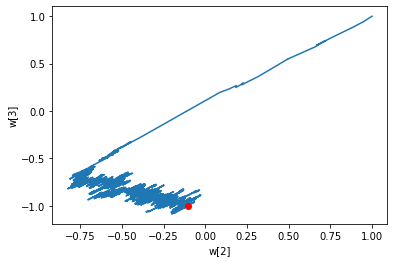

In [ ]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
layer2.score(x_val, y_val)

0.37362637362637363

In [ ]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(y_val, axis=0)
x_val_scaled = (x_val - val_mean)/val_std
layer2.score(x_val_scaled,y_val)

0.9340659340659341

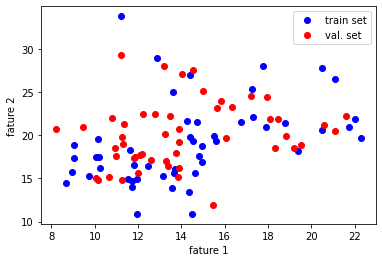

In [ ]:
plt.plot(x_train[:50, 0], x_train[:50,1],'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

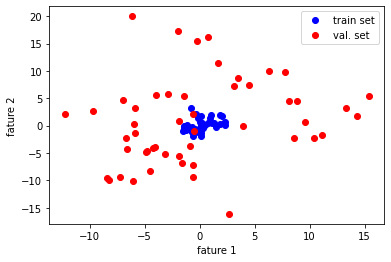

In [ ]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

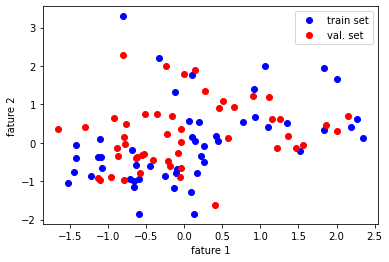

In [ ]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [ ]:
layer2.score(x_val_scaled, y_val)

0.967032967032967